In [182]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [183]:
df= pd.read_csv('Churn_Modelling.csv')
df.head()
                

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [184]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [186]:
df.duplicated().sum()

0

In [187]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [188]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [189]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [190]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [191]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [192]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [193]:
X= df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [194]:
X_train.shape

(8000, 11)

In [195]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)

In [196]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [197]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [198]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [199]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [200]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [201]:
history=model.fit(X_train_scaled,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 2s 6ms/step - loss: 0.7151 - accuracy: 0.5092 - val_loss: 0.5766 - val_accuracy: 0.7775
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5126 - accuracy: 0.7941 - val_loss: 0.4927 - val_accuracy: 0.7981
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4609 - accuracy: 0.7997 - val_loss: 0.4599 - val_accuracy: 0.8056
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4404 - accuracy: 0.8130 - val_loss: 0.4435 - val_accuracy: 0.8094
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4298 - accuracy: 0.8178 - val_loss: 0.4332 - val_accuracy: 0.8081
Epoch 6/100
128/128 [==============================] - 0s 4ms/step - loss: 0.4234 - accuracy: 0.8194 - val_loss: 0.4267 - val_accuracy: 0.8094
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4179 - accuracy: 0.8192 - val_loss: 0.4211 - val_accuracy: 0.8119

In [202]:
model.layers[1].get_weights()

[array([[-0.51495236, -0.4665958 , -0.32290125,  0.629315  ,  0.54264504,
         -0.93544316, -0.64479303,  0.36678275,  0.21395962, -0.5003736 ,
          0.29602247],
        [-0.13725822,  0.16293429,  0.60036415,  0.21847147, -0.70848656,
         -0.431652  , -0.2792152 , -0.13784572,  0.45656052,  0.06087233,
         -0.49797902],
        [ 0.20136656, -0.49245173, -0.47957146, -0.22563092, -0.8450167 ,
          0.14765708, -0.41504425,  1.8799839 , -0.43358845, -0.5124537 ,
         -1.0695745 ],
        [ 0.5567271 ,  0.30925843,  0.05605678, -0.22718193, -0.06421467,
          0.46940318,  0.07822639,  0.11888134, -0.36726707, -0.00743392,
         -0.06992864],
        [-0.2467072 ,  0.5658955 ,  0.381368  ,  0.0620481 ,  0.41663927,
         -2.2265954 , -0.66867447,  0.67020404, -0.23482223,  0.2219419 ,
         -0.23549211],
        [-0.6345654 , -0.30678475, -0.11356511, -0.29142037, -0.22335552,
         -0.19376835, -0.50410414, -0.14947201, -0.59094363, -0.1602728

In [203]:
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 997us/step


In [204]:
y_pred=np.where(y_log>0.5,1,0)

In [205]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8585

In [206]:
import matplotlib.pyplot as plt

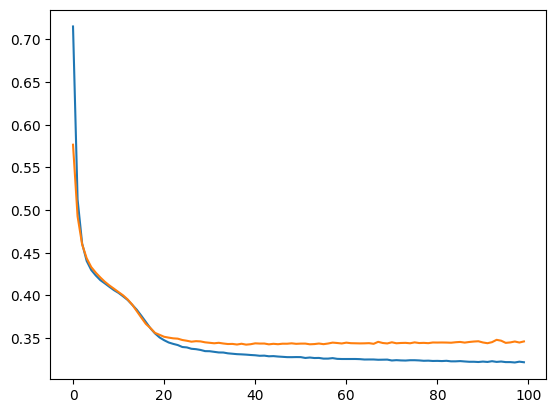

In [207]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


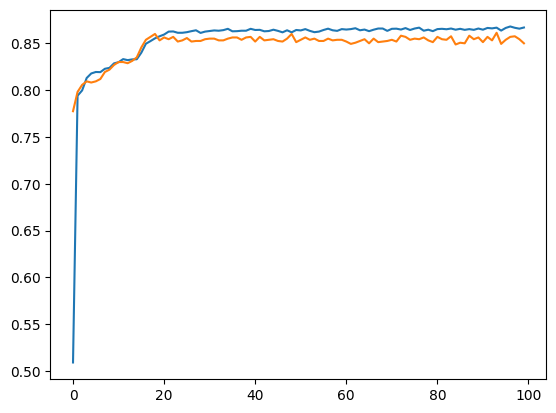

In [208]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
